In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
import os
from PIL import Image


# MNIST DATASET

### Loading Dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Visualisation of the images from dataset

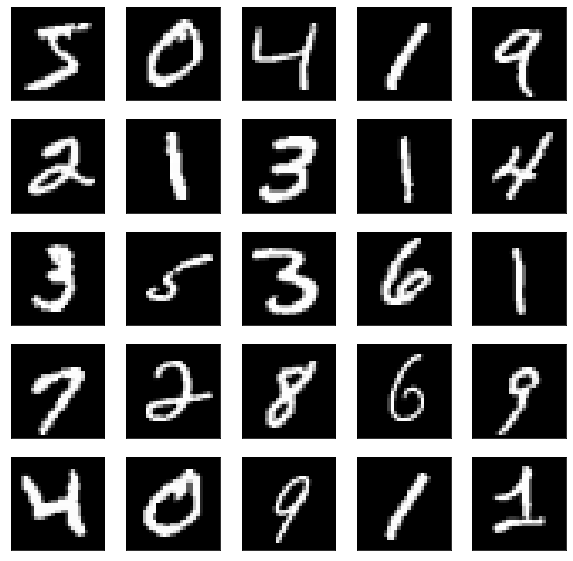

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
plt.show()

### Pre-Processing and Encoding

In [ ]:
# scaling the pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Encoding the labels using one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Model 

|Model|Architecture|
|--|--|
|Model 0|    8 ->  4 -> 10
|Model 1 |  32 -> 16 -> 10
|Model 2 |  64 -> 32 -> 10
|Model 3 | 128 -> 32 -> 10


In [ ]:
def compile_model(model_config):
    model = Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    for layer_config in model_config['layers']:
        model.add(Dense(layer_config['units'], activation=layer_config['activation']))
        
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model
models = [    { 
               "layers": [           
                   {                "type": "Dense",                "units": 8,                "activation": "relu"            },            
                   {                "type": "Dense",                "units": 4,                "activation": "relu"            },
                   {                "type": "Dense",                "units": 10,                "activation": "softmax"            }        ]
              },
          
              { 
               "layers": [            
                   {                "type": "Dense",                "units": 32,                "activation": "relu"            },            
                   {                "type": "Dense",                "units": 16,                "activation": "relu"            },
                   {                "type": "Dense",                "units": 10,                "activation": "softmax"            }        ]
              },
          
              { 
               "layers": [            
                   {                "type": "Dense",                "units": 64,                "activation": "relu"            },            
                   {                "type": "Dense",                "units": 32,                "activation": "relu"            },
                   {                "type": "Dense",                "units": 10,                "activation": "softmax"            }        ]
              },
          
              { 
               "layers": [            
                   {                "type": "Dense",                "units": 128,                "activation": "relu"            },            
                   {                "type": "Dense",                "units": 64,                "activation": "relu"            },
                   {                "type": "Dense",                "units": 10,                "activation": "softmax"            }        ]
              },
          
]


Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 1.1883 - accuracy: 0.6193 - val_loss: 0.7983 - val_accuracy: 0.7802
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7043 - accuracy: 0.8114 - val_loss: 0.6725 - val_accuracy: 0.8318
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6211 - accuracy: 0.8373 - val_loss: 0.6230 - val_accuracy: 0.8490
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5796 - accuracy: 0.8521 - val_loss: 0.5968 - val_accuracy: 0.8579
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5528 - accuracy: 0.8599 - val_loss: 0.5729 - val_accuracy: 0.8675
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5335 - accuracy: 0.8652 - val_loss: 0.5594 - val_accuracy: 0.8738
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5180 - accuracy: 0.8690 - val_loss: 0.5518 - val_accurac

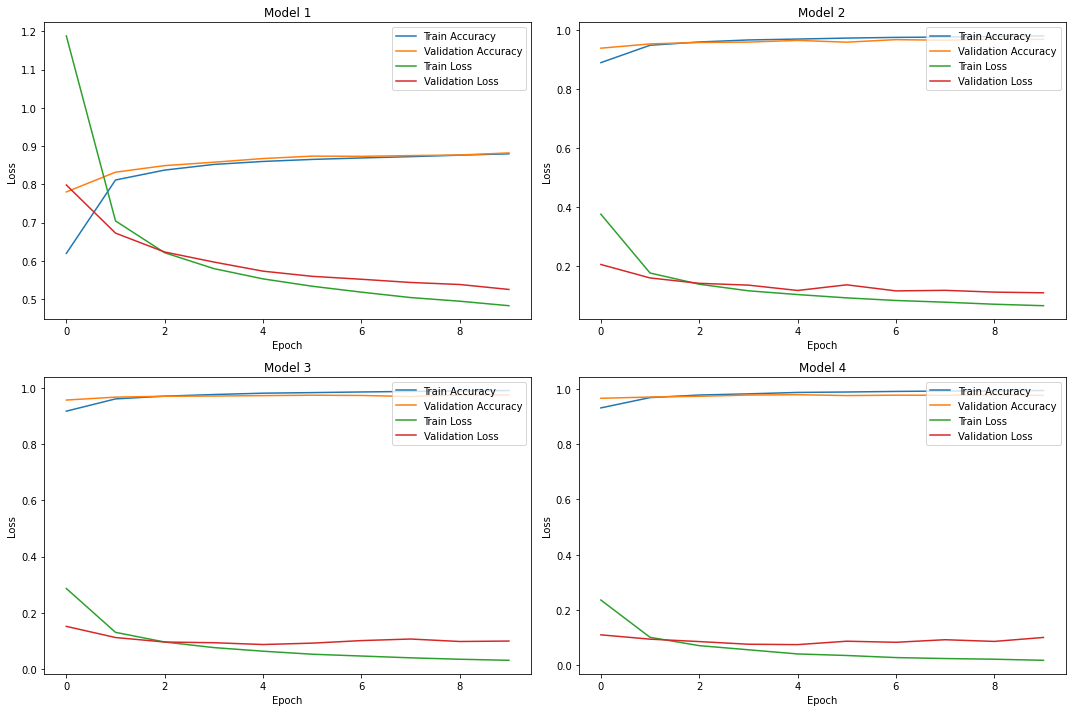

In [ ]:
# Saving Model Histories and accuracies with Different Parameters
histories = [] 
Test_acc = []
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs = axs.ravel()
for i, Model in enumerate(models):

  model = compile_model(Model)
  
  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model
  history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
  histories.append(history)
 
  # Model Evaluation 
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
  Test_acc.append(test_acc)
  print(f'Model {i} Test accuracy:', test_acc)


  axs[i].plot(history.history['accuracy'])
  axs[i].plot(history.history['val_accuracy'])
  axs[i].set_title('Model ' + str(i+1) )
  axs[i].plot(history.history['loss'])
  axs[i].plot(history.history['val_loss'])
  axs[i].set_ylabel('Loss')
  axs[i].set_xlabel('Epoch')
  axs[i].legend(['Train Accuracy','Validation Accuracy','Train Loss', 'Validation Loss'], loc='upper right')

plt.tight_layout()
plt.show()






Text(0.5, 1.0, 'Model Complexity VS Test Accuracy')

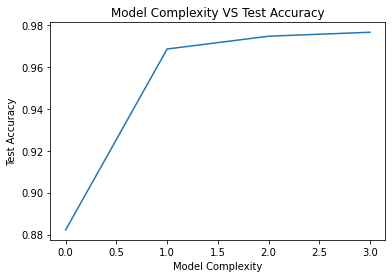

In [ ]:
plt.plot(Test_acc)
plt.xlabel("Model Complexity")
plt.ylabel("Test Accuracy")
plt.title("Model Complexity VS Test Accuracy")

# CATS VS DOGS

In [5]:
import cv2
data=[]
size=120
images=os.listdir("C:/Users/Lnovo/OneDrive/Desktop/DAIICT sem-2/Deep Learning/Lab/lab 4/train/")
train_pth="C:/Users/Lnovo/OneDrive/Desktop/DAIICT sem-2/Deep Learning/Lab/lab 4/train/"
for img in images:
    img_path=os.path.join(train_pth,img)
    img_arr=cv2.imread(img_path)
    img_arr=cv2.resize(img_arr,(size,size))
    if img.split(".")[0]=="cat":
        data.append([img_arr,0])
    else:
        data.append([img_arr,1])

In [12]:
X=[]
y=[]
for arr in data:
    X.append(arr[0])
    y.append(arr[1])
X=np.array(X)

y=np.array(y)
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {y.shape}")


Shape of X: (25000, 120, 120, 3)
Shape of Y: (25000,)


In [14]:
X_train,X_Val,y_train,y_Val=X[:20000],X[20000:],y[:20000],y[20000:]
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_Val = X_Val.reshape(X_Val.shape[0], -1) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_Val = keras.utils.to_categorical(y_Val, num_classes=2)


MemoryError: Unable to allocate 1.61 GiB for an array with shape (5000, 43200) and data type float64

In [11]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Use early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_Val, y_Val), callbacks=[early_stopping])


KeyboardInterrupt: 